In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pytry
import pickle
import glob
import pandas as pd
import os

from scipy import stats
import researchpy as rp

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

# With LMUs

In [2]:
data_dir = 'D:\NEN002\GridSearch_MLP_LMU'
test_param1 = 'q'
test_param2 = 'theta'
test_param3 = 'neurons'

In [3]:
lst=[]
for fname in os.listdir(data_dir):
    lst.append(fname)

In [4]:
q=[]
theta=[]
neurons=[]

for i in range(len(lst)):
    q.append(lst[i].split('_')[0])
    theta.append(lst[i].split('_')[1])
    neurons.append(lst[i].split('_')[2])

In [5]:
run=[]
test_target=[]
test_out=[]
accuracy=[]


for folder in os.listdir(data_dir):
    for fname in os.listdir(data_dir+'//'+folder):
        dat = data_dir+'//'+folder+'//'+fname
        if 'test_target' in fname:
            a = np.load(dat, allow_pickle=True) 
            test_target.append(a)
            run.append(fname.split('_')[0])
        elif 'test_out' in fname:
            a = np.load(dat, allow_pickle=True) 
            test_out.append(a)
        elif 'accuracy' in fname:
            a = np.load(dat, allow_pickle=True) 
            accuracy.append(a)

In [6]:
x = pd.DataFrame(columns=['run','test_target','test_out', 'accuracy'])
for i in range(len(run)):
    x.loc[i]=[run[i], test_target[i], test_out[i], accuracy[i]]

In [7]:
q1=pd.Series(q)
q1=q1.repeat(20)
q1=pd.DataFrame(q1)
q1.columns=[test_param1]
q1=q1.reset_index()

theta1=pd.Series(theta)
theta1=theta1.repeat(20)
theta1=pd.DataFrame(theta1)
theta1.columns=[test_param2]
theta1=theta1.reset_index()

neurons1=pd.Series(neurons)
neurons1=neurons1.repeat(20)
neurons1=pd.DataFrame(neurons1)
neurons1.columns=[test_param3]
neurons1=neurons1.reset_index()

In [8]:
grid=x.join(q1)
grid=grid.join(theta1['theta'])
grid=grid.join(neurons1['neurons'])

# Without LMUs

In [9]:
data_dir = 'D:\NEN002\GridSearch_MLP_Raw'
test_param1 = 'neurons'

In [10]:
neurons=[]
for fname in os.listdir(data_dir):
    neurons.append(fname)

In [11]:
run=[]
test_target=[]
test_out=[]
accuracy=[]


for folder in os.listdir(data_dir):
    for fname in os.listdir(data_dir+'//'+folder):
        dat = data_dir+'//'+folder+'//'+fname
        if 'test_target' in fname:
            a = np.load(dat, allow_pickle=True) 
            test_target.append(a)
            run.append(fname.split('_')[0])
        elif 'test_out' in fname:
            a = np.load(dat, allow_pickle=True) 
            test_out.append(a)
        elif 'accuracy' in fname:
            a = np.load(dat, allow_pickle=True) 
            accuracy.append(a)

In [12]:
x = pd.DataFrame(columns=['run','test_target','test_out', 'accuracy'])
for i in range(len(run)):
    x.loc[i]=[run[i], test_target[i], test_out[i], accuracy[i]]

In [13]:
neurons1=pd.Series(neurons)
neurons1=neurons1.repeat(20)
neurons1=pd.DataFrame(neurons1)
neurons1.columns=[test_param1]
neurons1=neurons1.reset_index()

In [14]:
grid_raw=x.join(neurons1['neurons'])

# Interaction Plots

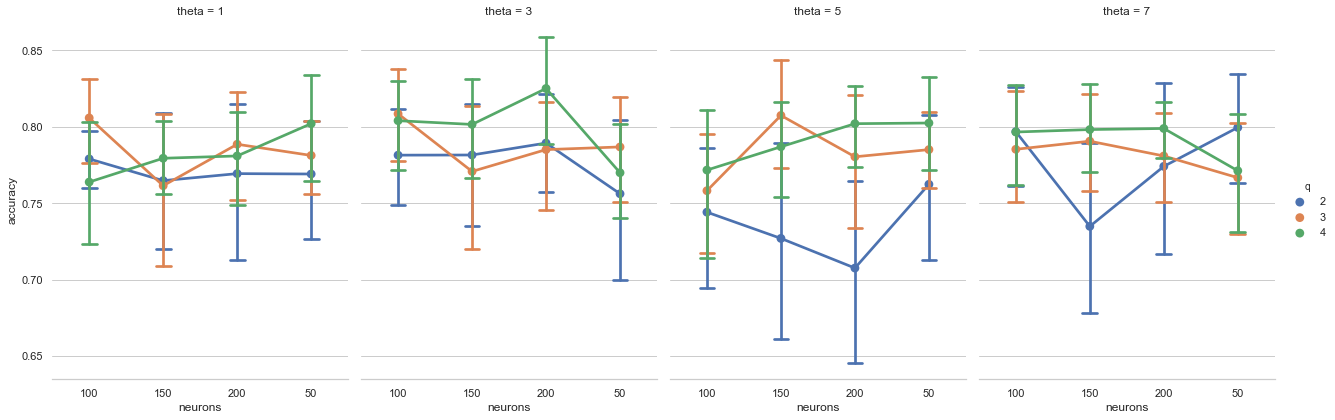

In [15]:
sns.set(style="whitegrid")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="neurons", y="accuracy", hue="q", col="theta",
                capsize=.2, height=6, aspect=.75,
                kind="point", data=grid)
g.despine(left=True)

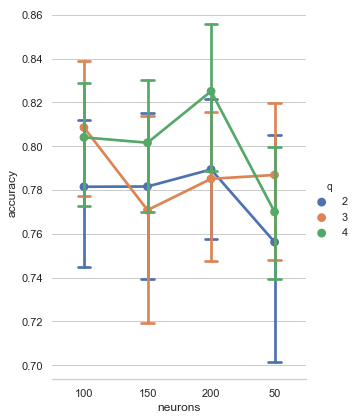

In [16]:
t3=grid['theta']=='3'
sns.set(style="whitegrid")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="neurons", y="accuracy", hue="q",
                capsize=.2, height=6, aspect=.75,
                kind="point", data=grid[t3])
g.despine(left=True)

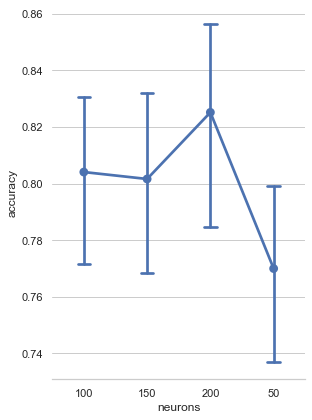

In [17]:
q4=grid['q']=='4'
sns.set(style="whitegrid")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="neurons", y="accuracy",
                capsize=.2, height=6, aspect=.75,
                kind="point", data=grid[q4&t3])
g.despine(left=True)

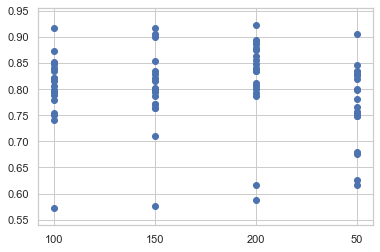

In [18]:
plt.scatter(grid[q4&t3]['neurons'], grid[q4&t3]['accuracy'])
plt.show()


Best:
    q=4
    theta=3
    neurons=200

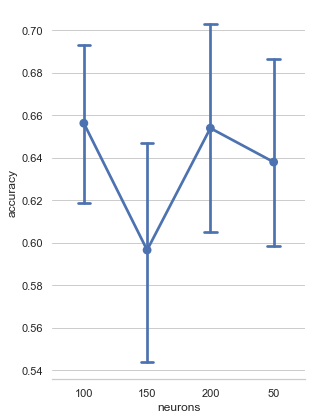

In [19]:
sns.set(style="whitegrid")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="neurons", y="accuracy",
                capsize=.2, height=6, aspect=.75,
                kind="point", data=grid_raw)
g.despine(left=True)

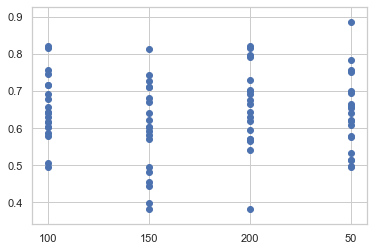

In [20]:
plt.scatter(grid_raw['neurons'], grid_raw['accuracy'])
plt.show()
